In [1]:
import pandas as pd;
import os;
import numpy as np;

In [2]:
source = './earthquake';

In [3]:
import urllib.request;

os.mkdir(source);
def get_file(filename):
    url = f'https://s3.amazonaws.com/drivendata/data/57/public/{filename}.csv';
    file = os.path.join(source, f'{filename}.csv');
    urllib.request.urlretrieve(url, file)
    return;

get_file('train_values');
get_file('train_labels');
get_file('test_values');

In [4]:
trainval = pd.merge(pd.read_csv(os.path.join(source, 'train_values.csv')), pd.read_csv(os.path.join(source, 'train_labels.csv')));
test = pd.read_csv(os.path.join(source, 'test_values.csv'));

In [5]:
trainval.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
trainval['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [7]:
columns = trainval.columns
columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [8]:
trainval['age'].value_counts().sort_index(ascending=False)

995     1390
200      106
195        2
190        3
185        1
180        7
175        5
170        6
165        2
160        6
155        1
150      142
145        3
140        9
135        5
130        9
125       37
120      180
115       21
110      100
105       89
100     1364
95       414
90      1085
85       847
80      3055
75       512
70      1975
65      1123
60      3612
55      2033
50      7257
45      4711
40     10559
35     10710
30     18028
25     24366
20     32182
15     36010
10     38896
5      33697
0      26041
Name: age, dtype: int64

In [9]:
age_groups = np.array(['[1-20]', '[21-40]', '[40-60]', '[61-80]', '[81-100]', '[101, 120]', '[121-140]', '[141-160]', '[161-180]', '[181-200]', '>200']);

In [10]:
age_groups[10]

'>200'

In [11]:
def sort_age(x):
    num = int((x + 1) / 20);
    if(num > 9):
        num = 10;
    return age_groups[num];

In [12]:
trainval2 = trainval.copy();

In [13]:
trainval2['age'] = trainval2['age'].apply(sort_age)

In [14]:
trainval2.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [15]:
superstructure = []
secondary = []
for column in trainval2.columns:
    if column.find('has_superstructure_') > -1:
        superstructure.append(column);
    
    if column.find('has_secondary_use') > -1 and len(secondary) < 7:
        secondary.append(column);
print(len(superstructure), len(secondary))

11 7


In [16]:
from sklearn.model_selection import train_test_split;

train, val = train_test_split(trainval2, random_state=42)
print(train.shape, val.shape)
bool_feature = superstructure+['has_secondary_use'];
feature = ['count_floors_pre_eq', 'age', 'count_families', 'position', 'land_surface_condition', 'ground_floor_type', 'foundation_type', 'roof_type', 'other_floor_type']
target = 'damage_grade'

x_train = train[feature+bool_feature];
y_train = train[target];
x_val = val[feature+bool_feature];
y_val = val[target];

x_test = test[feature+bool_feature];

(195450, 40) (65151, 40)


In [17]:
import category_encoders as ce;
from catboost import CatBoostClassifier;
from sklearn.pipeline import make_pipeline;
from sklearn.impute import SimpleImputer;
from sklearn.metrics import accuracy_score;
from sklearn.metrics import mean_squared_error;

In [18]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    CatBoostClassifier(learning_rate=0.5)
)

In [19]:
from sklearn.metrics import SCORERS;
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [20]:
pipeline.fit(x_train, y_train)

0:	learn: 0.9275943	total: 129ms	remaining: 2m 8s
1:	learn: 0.8588374	total: 185ms	remaining: 1m 32s
2:	learn: 0.8264241	total: 241ms	remaining: 1m 20s
3:	learn: 0.8104561	total: 296ms	remaining: 1m 13s
4:	learn: 0.8021349	total: 371ms	remaining: 1m 13s
5:	learn: 0.7969811	total: 466ms	remaining: 1m 17s
6:	learn: 0.7935006	total: 523ms	remaining: 1m 14s
7:	learn: 0.7916515	total: 581ms	remaining: 1m 11s
8:	learn: 0.7894361	total: 650ms	remaining: 1m 11s
9:	learn: 0.7884739	total: 753ms	remaining: 1m 14s
10:	learn: 0.7875269	total: 837ms	remaining: 1m 15s
11:	learn: 0.7862354	total: 901ms	remaining: 1m 14s
12:	learn: 0.7856268	total: 966ms	remaining: 1m 13s
13:	learn: 0.7848735	total: 1.04s	remaining: 1m 13s
14:	learn: 0.7844039	total: 1.11s	remaining: 1m 13s
15:	learn: 0.7836669	total: 1.18s	remaining: 1m 12s
16:	learn: 0.7827790	total: 1.28s	remaining: 1m 14s
17:	learn: 0.7821912	total: 1.46s	remaining: 1m 19s
18:	learn: 0.7816935	total: 1.56s	remaining: 1m 20s
19:	learn: 0.7808891	to

161:	learn: 0.7590796	total: 11.8s	remaining: 1m 1s
162:	learn: 0.7589627	total: 11.9s	remaining: 1m 1s
163:	learn: 0.7588540	total: 12s	remaining: 1m
164:	learn: 0.7588022	total: 12s	remaining: 1m
165:	learn: 0.7587465	total: 12.1s	remaining: 1m
166:	learn: 0.7587011	total: 12.1s	remaining: 1m
167:	learn: 0.7586533	total: 12.2s	remaining: 1m
168:	learn: 0.7586057	total: 12.2s	remaining: 1m
169:	learn: 0.7585675	total: 12.3s	remaining: 59.9s
170:	learn: 0.7585112	total: 12.3s	remaining: 59.8s
171:	learn: 0.7584415	total: 12.4s	remaining: 59.8s
172:	learn: 0.7583071	total: 12.5s	remaining: 59.6s
173:	learn: 0.7582319	total: 12.5s	remaining: 59.5s
174:	learn: 0.7581939	total: 12.6s	remaining: 59.4s
175:	learn: 0.7580676	total: 12.7s	remaining: 59.3s
176:	learn: 0.7579874	total: 12.8s	remaining: 59.3s
177:	learn: 0.7579192	total: 12.8s	remaining: 59.2s
178:	learn: 0.7578721	total: 12.9s	remaining: 59.1s
179:	learn: 0.7577736	total: 13s	remaining: 59s
180:	learn: 0.7576955	total: 13s	remai

324:	learn: 0.7493181	total: 22.8s	remaining: 47.3s
325:	learn: 0.7492712	total: 22.9s	remaining: 47.2s
326:	learn: 0.7492375	total: 22.9s	remaining: 47.2s
327:	learn: 0.7491782	total: 23s	remaining: 47.1s
328:	learn: 0.7491541	total: 23s	remaining: 47s
329:	learn: 0.7490946	total: 23.1s	remaining: 46.9s
330:	learn: 0.7490405	total: 23.2s	remaining: 46.8s
331:	learn: 0.7490138	total: 23.2s	remaining: 46.8s
332:	learn: 0.7489779	total: 23.3s	remaining: 46.7s
333:	learn: 0.7488816	total: 23.4s	remaining: 46.6s
334:	learn: 0.7488236	total: 23.5s	remaining: 46.6s
335:	learn: 0.7487790	total: 23.5s	remaining: 46.5s
336:	learn: 0.7487298	total: 23.6s	remaining: 46.4s
337:	learn: 0.7486631	total: 23.6s	remaining: 46.3s
338:	learn: 0.7486291	total: 23.7s	remaining: 46.2s
339:	learn: 0.7486023	total: 23.8s	remaining: 46.2s
340:	learn: 0.7485798	total: 23.9s	remaining: 46.1s
341:	learn: 0.7485295	total: 23.9s	remaining: 46s
342:	learn: 0.7484776	total: 24s	remaining: 46s
343:	learn: 0.7484123	to

485:	learn: 0.7427235	total: 33.9s	remaining: 35.8s
486:	learn: 0.7426865	total: 33.9s	remaining: 35.7s
487:	learn: 0.7426714	total: 34s	remaining: 35.6s
488:	learn: 0.7426449	total: 34s	remaining: 35.6s
489:	learn: 0.7426165	total: 34.1s	remaining: 35.5s
490:	learn: 0.7425762	total: 34.1s	remaining: 35.4s
491:	learn: 0.7425524	total: 34.2s	remaining: 35.3s
492:	learn: 0.7425176	total: 34.3s	remaining: 35.3s
493:	learn: 0.7424900	total: 34.4s	remaining: 35.2s
494:	learn: 0.7424638	total: 34.4s	remaining: 35.1s
495:	learn: 0.7424102	total: 34.5s	remaining: 35.1s
496:	learn: 0.7423622	total: 34.6s	remaining: 35s
497:	learn: 0.7423127	total: 34.6s	remaining: 34.9s
498:	learn: 0.7422593	total: 34.7s	remaining: 34.8s
499:	learn: 0.7422173	total: 34.8s	remaining: 34.8s
500:	learn: 0.7421807	total: 34.8s	remaining: 34.7s
501:	learn: 0.7421386	total: 34.9s	remaining: 34.6s
502:	learn: 0.7421070	total: 35s	remaining: 34.5s
503:	learn: 0.7420677	total: 35s	remaining: 34.5s
504:	learn: 0.7420359	

645:	learn: 0.7376107	total: 45.4s	remaining: 24.9s
646:	learn: 0.7375987	total: 45.4s	remaining: 24.8s
647:	learn: 0.7375558	total: 45.5s	remaining: 24.7s
648:	learn: 0.7375327	total: 45.6s	remaining: 24.7s
649:	learn: 0.7375039	total: 45.7s	remaining: 24.6s
650:	learn: 0.7374880	total: 45.8s	remaining: 24.5s
651:	learn: 0.7374629	total: 45.9s	remaining: 24.5s
652:	learn: 0.7374493	total: 45.9s	remaining: 24.4s
653:	learn: 0.7374290	total: 46s	remaining: 24.3s
654:	learn: 0.7373977	total: 46s	remaining: 24.2s
655:	learn: 0.7373773	total: 46.1s	remaining: 24.2s
656:	learn: 0.7373456	total: 46.1s	remaining: 24.1s
657:	learn: 0.7373248	total: 46.2s	remaining: 24s
658:	learn: 0.7373018	total: 46.3s	remaining: 24s
659:	learn: 0.7372845	total: 46.4s	remaining: 23.9s
660:	learn: 0.7372558	total: 46.4s	remaining: 23.8s
661:	learn: 0.7372367	total: 46.5s	remaining: 23.7s
662:	learn: 0.7372218	total: 46.6s	remaining: 23.7s
663:	learn: 0.7371898	total: 46.6s	remaining: 23.6s
664:	learn: 0.737148

804:	learn: 0.7335449	total: 57.2s	remaining: 13.9s
805:	learn: 0.7335203	total: 57.4s	remaining: 13.8s
806:	learn: 0.7334909	total: 57.4s	remaining: 13.7s
807:	learn: 0.7334799	total: 57.5s	remaining: 13.7s
808:	learn: 0.7334569	total: 57.6s	remaining: 13.6s
809:	learn: 0.7334364	total: 57.6s	remaining: 13.5s
810:	learn: 0.7333966	total: 57.7s	remaining: 13.5s
811:	learn: 0.7333774	total: 57.8s	remaining: 13.4s
812:	learn: 0.7333507	total: 57.9s	remaining: 13.3s
813:	learn: 0.7333205	total: 58s	remaining: 13.2s
814:	learn: 0.7332787	total: 58s	remaining: 13.2s
815:	learn: 0.7332371	total: 58.1s	remaining: 13.1s
816:	learn: 0.7332186	total: 58.2s	remaining: 13s
817:	learn: 0.7331855	total: 58.3s	remaining: 13s
818:	learn: 0.7331567	total: 58.4s	remaining: 12.9s
819:	learn: 0.7331441	total: 58.4s	remaining: 12.8s
820:	learn: 0.7331240	total: 58.5s	remaining: 12.8s
821:	learn: 0.7331077	total: 58.6s	remaining: 12.7s
822:	learn: 0.7330896	total: 58.6s	remaining: 12.6s
823:	learn: 0.733069

965:	learn: 0.7298908	total: 1m 8s	remaining: 2.42s
966:	learn: 0.7298726	total: 1m 8s	remaining: 2.35s
967:	learn: 0.7298507	total: 1m 8s	remaining: 2.27s
968:	learn: 0.7298235	total: 1m 8s	remaining: 2.21s
969:	learn: 0.7298011	total: 1m 8s	remaining: 2.13s
970:	learn: 0.7297698	total: 1m 9s	remaining: 2.06s
971:	learn: 0.7297265	total: 1m 9s	remaining: 1.99s
972:	learn: 0.7297043	total: 1m 9s	remaining: 1.92s
973:	learn: 0.7296754	total: 1m 9s	remaining: 1.85s
974:	learn: 0.7296680	total: 1m 9s	remaining: 1.78s
975:	learn: 0.7296461	total: 1m 9s	remaining: 1.71s
976:	learn: 0.7296255	total: 1m 9s	remaining: 1.64s
977:	learn: 0.7296044	total: 1m 9s	remaining: 1.56s
978:	learn: 0.7295855	total: 1m 9s	remaining: 1.49s
979:	learn: 0.7295755	total: 1m 9s	remaining: 1.42s
980:	learn: 0.7295429	total: 1m 9s	remaining: 1.35s
981:	learn: 0.7295170	total: 1m 9s	remaining: 1.28s
982:	learn: 0.7294860	total: 1m 9s	remaining: 1.21s
983:	learn: 0.7294490	total: 1m 9s	remaining: 1.14s
984:	learn: 

Pipeline(memory=None,
     steps=[('ordinalencoder', OrdinalEncoder(cols=['age', 'position', 'land_surface_condition', 'ground_floor_type', 'foundation_type', 'roof_type', 'other_floor_type'],
        drop_invariant=False, handle_missing='value',
        handle_unknown='value',
        mapping=[{'col': 'age', 'mapping': [21-4...      verbose=0)), ('catboostclassifier', <catboost.core.CatBoostClassifier object at 0x132f5a048>)])

In [21]:
y_pred = pipeline.predict(x_val)

In [22]:
score = "%.3f" %(accuracy_score(y_val, y_pred))
print(f'Accuracy Score: {score}')#"%.3f" %(accuracy_score(y_val, y_pred))

Accuracy Score: 0.599


In [23]:
print(f'Validation Score: {"%.3f" %(np.sqrt(mean_squared_error(y_val, y_pred)))}')

Validation Score: 0.645


In [24]:
booster = pipeline.named_steps['catboostclassifier']
size = len(booster.feature_importances_)

In [25]:
encoder = pipeline.named_steps['ordinalencoder'];
feature_names = encoder.transform(x_val).columns
importances = pd.Series(booster.feature_importances_, feature_names)

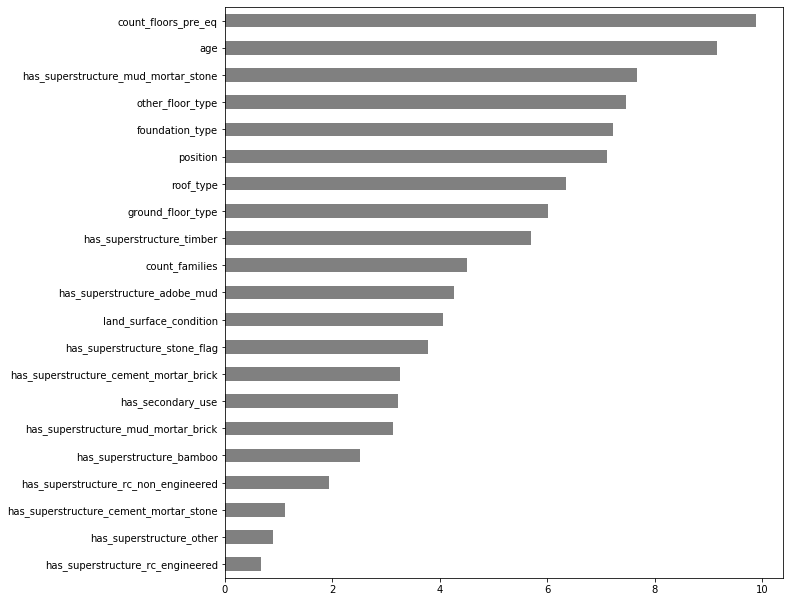

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt;

plt.figure(figsize=(10, size/2))
importances.sort_values().plot.barh(color='grey')

In [27]:
pd.crosstab(trainval2['age'].sort_index(), trainval2['damage_grade'])

damage_grade,1,2,3
age,,,
>200,182,886,428
[1-20],20041,74888,39715
"[101, 120]",13,1041,520
[121-140],3,131,97
[141-160],1,108,46
[161-180],0,12,7
[181-200],0,10,3
[21-40],4077,49366,31843
[40-60],618,14261,9681


In [28]:
pd.crosstab(trainval2['count_floors_pre_eq'], trainval2['damage_grade'])

damage_grade,1,2,3
count_floors_pre_eq,,,
1,8969,20798,10674
2,12593,93968,50062
3,2537,28479,24601
4,707,3374,1343
5,254,1481,511
6,53,133,23
7,10,25,4
8,0,1,0
9,1,0,0


In [29]:
from sklearn.metrics import confusion_matrix;
import seaborn as sns;
import numpy as np;

In [30]:
cm = confusion_matrix(y_val, y_pred);
cm

array([[ 2184,  3983,   180],
       [ 1335, 31090,  4569],
       [  137, 15946,  5727]])

In [31]:
columns = [f'Predicted "{n}"' for n in y_val.sort_values().unique()];
indexes = [f'Actual "{n}"' for n in y_val.sort_values().unique()];
indexes

['Actual "1"', 'Actual "2"', 'Actual "3"']

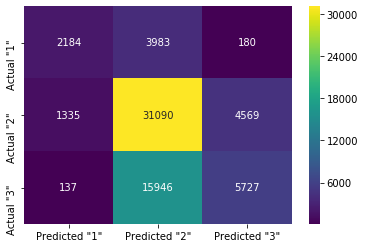

In [32]:
df2 = pd.DataFrame(cm, columns=columns, index=indexes)
sns.heatmap(df2, cmap='viridis', annot=True,  fmt='d')

In [33]:
from sklearn.metrics import classification_report;
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.34      0.44      6347
           2       0.61      0.84      0.71     36994
           3       0.55      0.26      0.35     21810

   micro avg       0.60      0.60      0.60     65151
   macro avg       0.58      0.48      0.50     65151
weighted avg       0.59      0.60      0.56     65151

